In [3]:
import sys
sys.path.append("../../../")

## 数据

In [4]:
from pylib.utils.functions_for_regression import nonlin_data, plot_scatter
import matplotlib.pyplot as plt

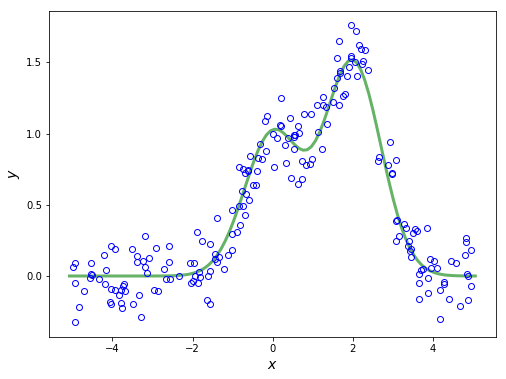

In [5]:
X_train, y_train, X_test, y_test, f_truth= nonlin_data(300)
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, f=f_truth)
plt.show()

## 梯度提升回归

In [9]:
from pylib.utils.functions_for_regression import plot_fitted_line
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
gbdt = GradientBoostingRegressor()
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
y_pred = gbdt.predict(X_train)
train_err = mean_squared_error(y_train, y_pred)
print("训练样本误差: {:.3f}".format(train_err)) # 均方差

训练样本误差: 0.008


In [11]:
y_pred = gbdt.predict(X_test)
test_err = mean_squared_error(y_test, y_pred)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.029


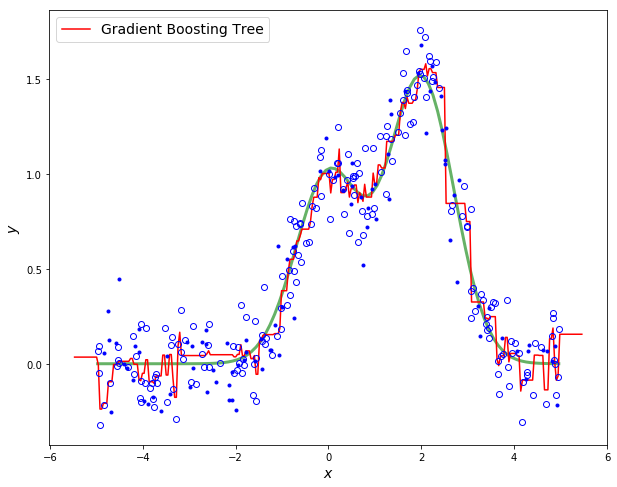

In [13]:
plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
plot_fitted_line(gbdt, "Gradient Boosting Tree")
plt.show()

### 寻找最优参数

In [15]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_estimators': np.arange(50, 550, 50),
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
              'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'subsample': [0.3, 0.5, 0.7, 1.0]}
gbdt_cv = GridSearchCV(GradientBoostingRegressor(random_state=42),
                       param_grid,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       n_jobs=-1)
gbdt_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
                         'subsample': [0.3, 0.5, 0.7, 1.0]},
             scoring='neg_mean_squared_error')

In [21]:
gbdt_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 10,
 'n_estimators': 100,
 'subsample': 0.7}

### 使用最优模型

In [22]:
gbdt_best = gbdt_cv.best_estimator_

In [23]:
y_pred = gbdt_best.predict(X_train)
train_err = mean_squared_error(y_train, y_pred)
print("训练样本误差: {:.3f}".format(train_err)) # 均方差

训练样本误差: 0.015


In [24]:
y_pred = gbdt_best.predict(X_test)
test_err = mean_squared_error(y_test, y_pred)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.026


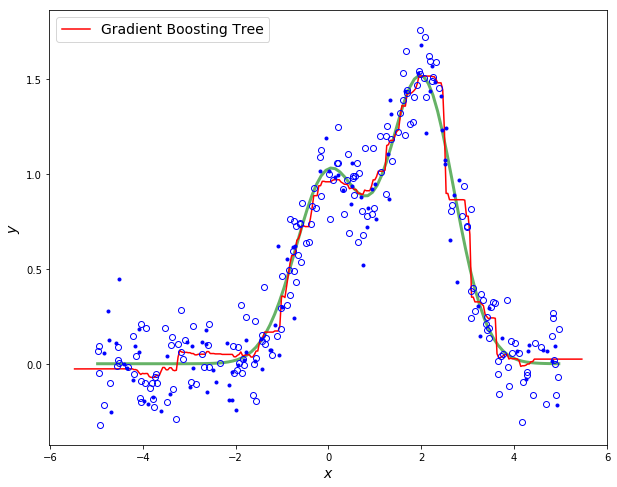

In [25]:
plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
plot_fitted_line(gbdt_best, "Gradient Boosting Tree")
plt.show()